In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
image = cv2.imread('bycicle.png',0) 
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.png', noise_img)
plt.imshow(noise_img)

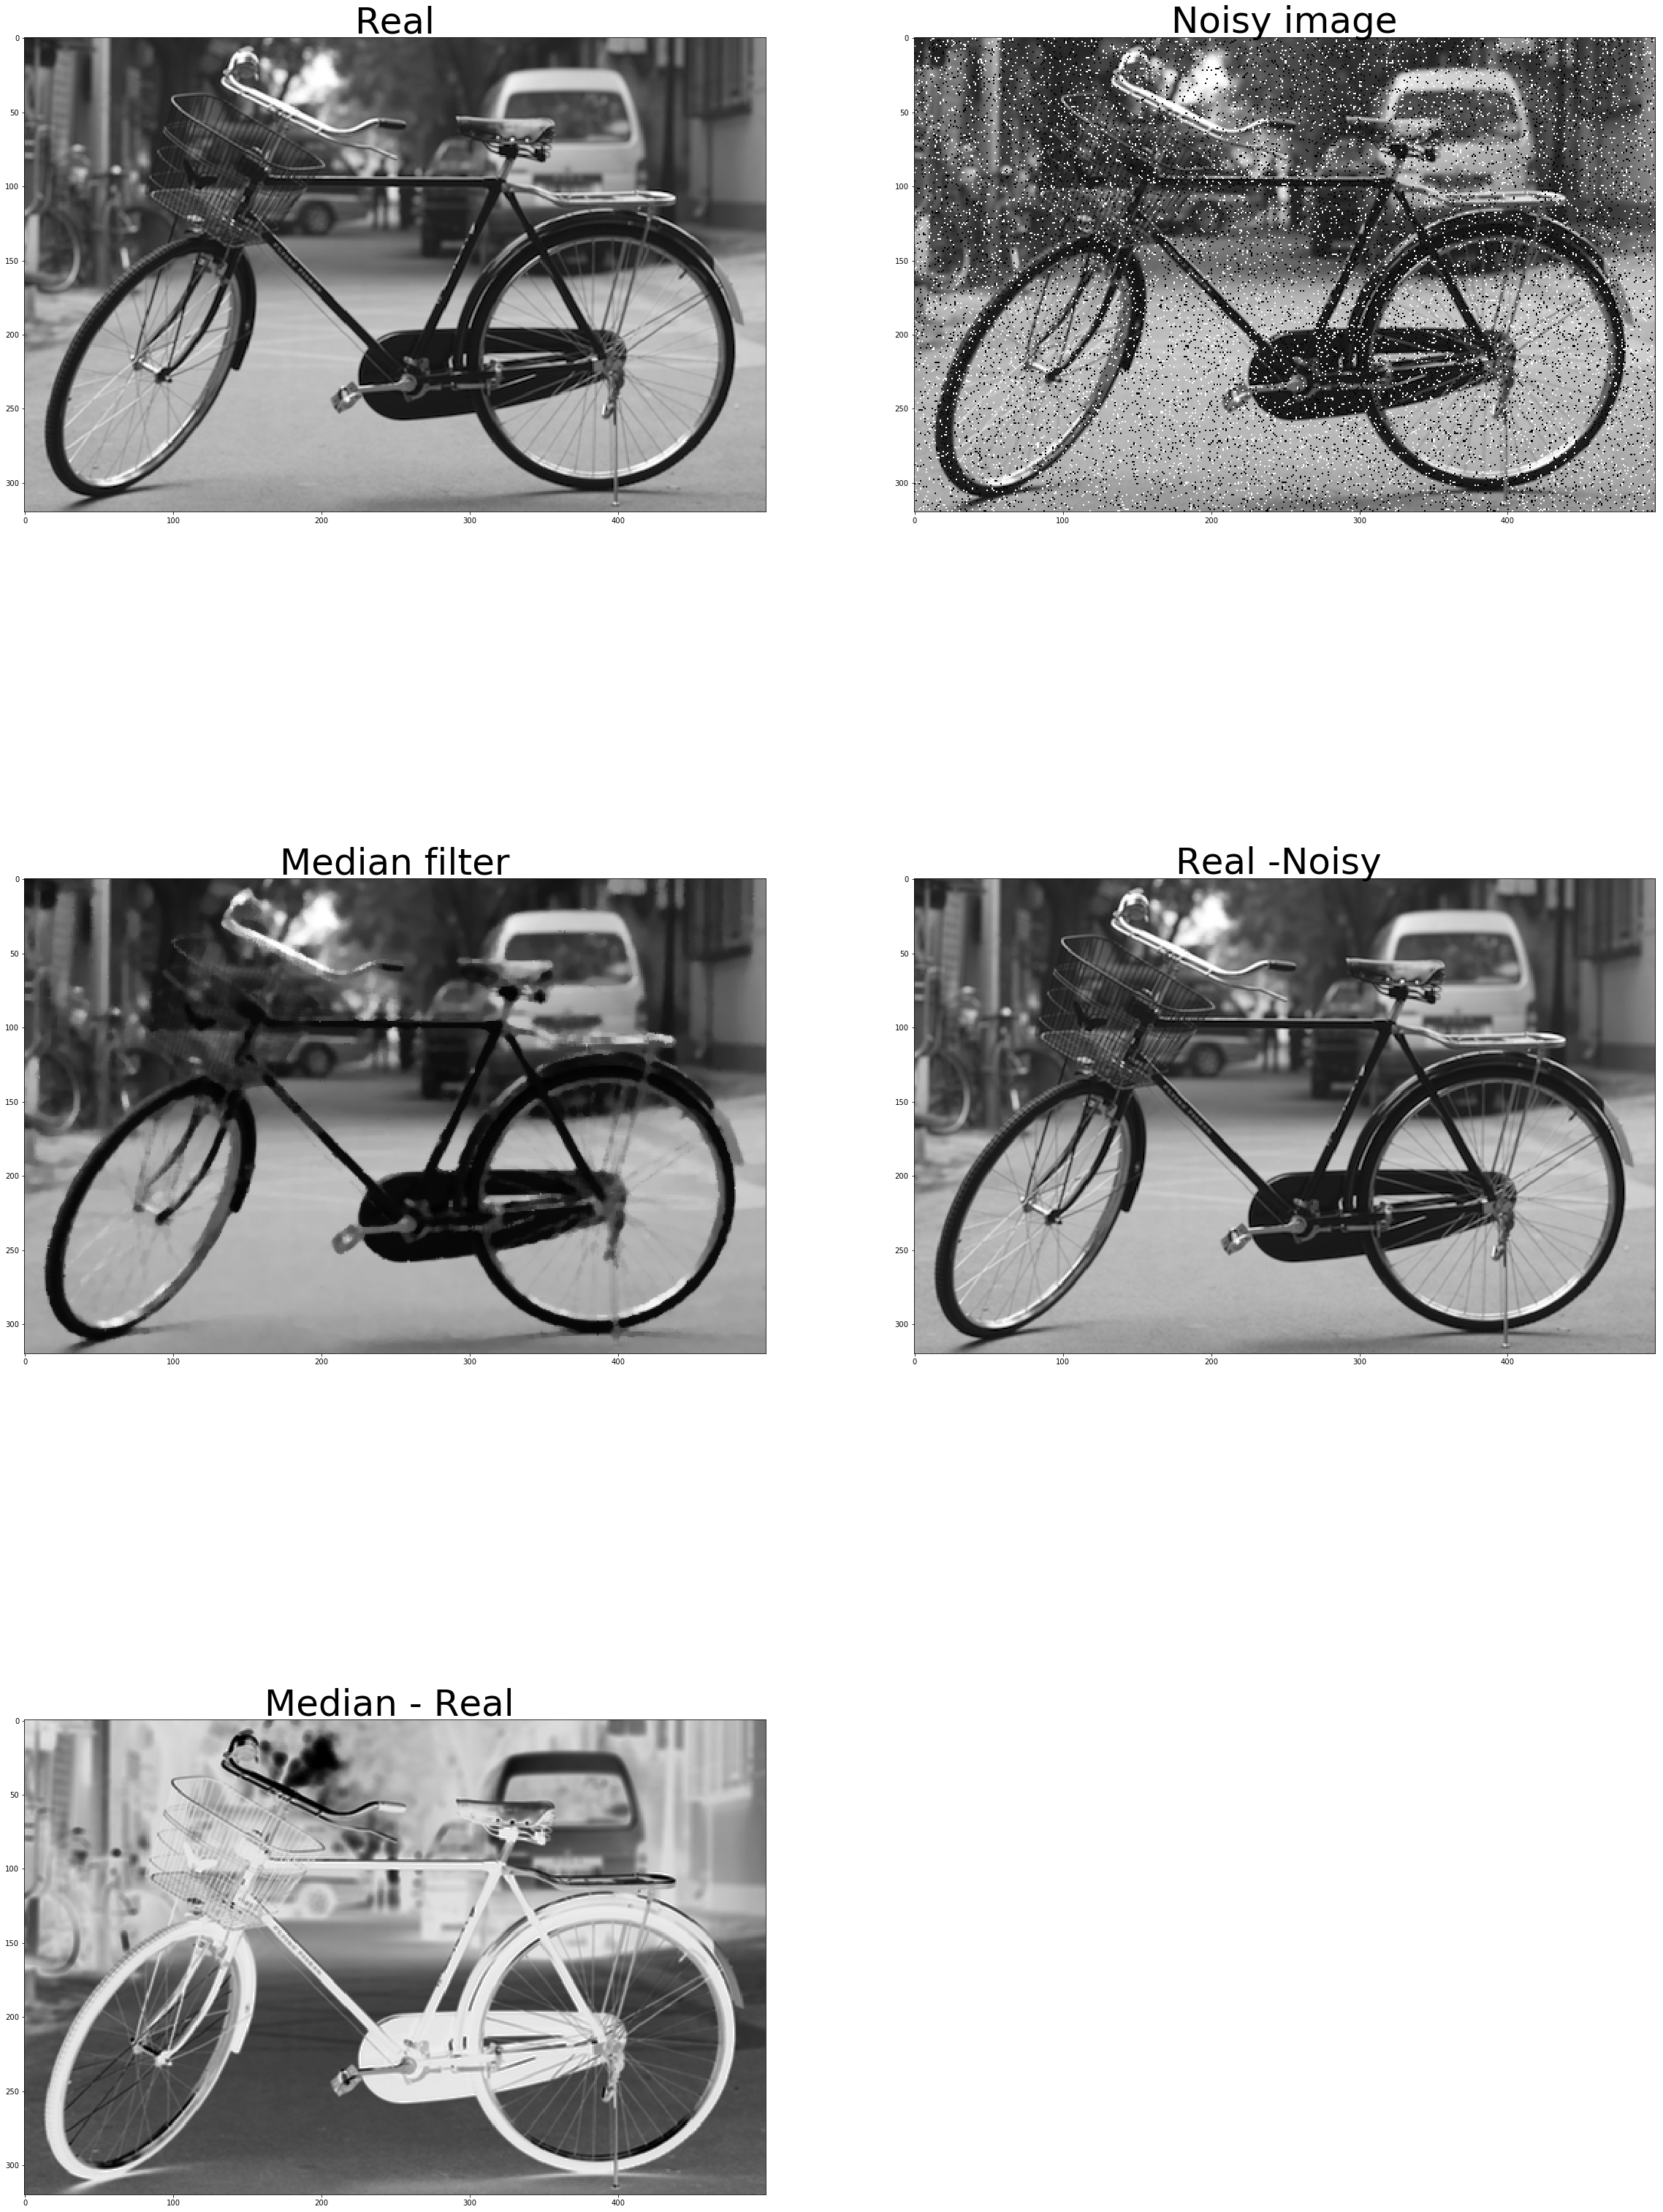

In [13]:
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as ndi
image = Image.open('bycicle.png').convert('L')
im = img.imread('sp_noise.png')
fig = plt.figure(figsize= (40,60))

from scipy.ndimage.filters import median_filter
med =median_filter(im, size =5)

plt.subplot(321)
plt.imshow(image,cmap='gray')
plt.title ('Real', fontsize = 50)
plt.subplot(322)
plt.imshow(im,cmap='gray')
plt.title ('Noisy image', fontsize = 50)
plt.subplot(323)
plt.imshow(med,cmap='gray')
plt.title ('Median filter', fontsize = 50)
plt.subplot(324)
plt.imshow(image-im,cmap='gray' )
plt.title ('Real -Noisy ', fontsize = 50)
plt.subplot(325)
plt.imshow(med-image,cmap='gray' )
plt.title ('Median - Real ', fontsize = 50)
plt.show()